In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_fill), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_fill[:5000], y_train_fill[5000:]

In [7]:
class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 1.0163 - accuracy: 0.6800 - val_loss: 0.5243 - val_accuracy: 0.8140
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5061 - accuracy: 0.8216 - val_loss: 0.4435 - val_accuracy: 0.8460
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4474 - accuracy: 0.8424 - val_loss: 0.4159 - val_accuracy: 0.8578
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4282 - accuracy: 0.8496 - val_loss: 0.3992 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4010 - accuracy: 0.8581 - val_loss: 0.3886 - val_accuracy: 0.8642
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3824 - accuracy: 0.8647 - val_loss: 0.3928 - val_accuracy: 0.8590
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3718 - accuracy: 0.8683 - val_loss: 0.3709 - val_accuracy:

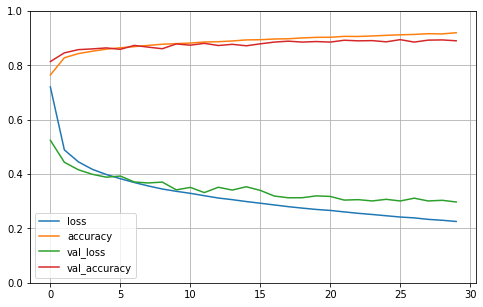

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()